In [2]:
!pip install gdown

In [3]:
import gdown
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from skimage import feature
import cv2

In [4]:
file_id = "18fRamctgsdMh0E0DgxYX_ZdQs2e_Qq73"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "fruits360.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=18fRamctgsdMh0E0DgxYX_ZdQs2e_Qq73
From (redirected): https://drive.google.com/uc?id=18fRamctgsdMh0E0DgxYX_ZdQs2e_Qq73&confirm=t&uuid=5dd64a6c-8f08-43bb-baf6-4d9c624415a6
To: /content/fruits360.zip
100%|██████████| 1.01G/1.01G [00:25<00:00, 40.5MB/s]


'fruits360.zip'

In [5]:
zip_file_name = "fruits360.zip"
os.makedirs("dataset", exist_ok=True)

with zipfile.ZipFile(zip_file_name, "r") as zip_ref:
    zip_ref.extractall("dataset")

In [6]:
# DATASET_DIR = './dataset/fruits360/fruits-360_dataset_100x100/fruits-360/'
DATASET_DIR = "./dataset/fruits360/fruits-360_dataset_original-size/fruits-360-original-size/"
SET_PATHS_IMAGES = set()
WIDTHS = []
HEIGHTS = []

In [7]:
def init_set_paths_images():
    for root, dirs, files in os.walk(DATASET_DIR):
        for file in files:
            if file.endswith((".png", ".jpg", ".jpeg")):
                file_path = os.path.join(root, file)
                SET_PATHS_IMAGES.add(file_path)

In [8]:
def get_list_size_img() -> list[int]:
    widths = []
    heights = []
    if len(SET_PATHS_IMAGES) == 0:
        return
    for file_path in SET_PATHS_IMAGES:
        with Image.open(file_path) as img:
            widths.append(img.width)
            heights.append(img.height)
    return widths, heights

In [9]:
def get_mean_std_chanels_img() -> dict[str, float]:
    sum_mean_r = 0
    sum_mean_g = 0
    sum_mean_b = 0
    sum_r_std = 0
    sum_g_std = 0
    sum_b_std = 0
    image_count = 0

    if len(SET_PATHS_IMAGES) == 0:
        return
    for file_path in SET_PATHS_IMAGES:
        with Image.open(file_path) as img:
            img = img.convert("RGB")
            np_img = np.array(img).astype(np.float64)
            r = np_img[:, :, 0]
            g = np_img[:, :, 1]
            b = np_img[:, :, 2]

            sum_mean_r += np.mean(r)
            sum_mean_g += np.mean(g)
            sum_mean_b += np.mean(b)

            sum_r_std += np.std(r)
            sum_g_std += np.std(g)
            sum_b_std += np.std(b)

            image_count += 1

    return {
        "mean_r": sum_mean_r / image_count,
        "mean_g": sum_mean_g / image_count,
        "mean_b": sum_mean_b / image_count,
        "std_r": sum_r_std / image_count,
        "std_g": sum_g_std / image_count,
        "std_b": sum_b_std / image_count,
    }

In [23]:
def scatter_size_images():
    plt.figure(figsize=(10, 6))
    plt.scatter(WIDTHS, HEIGHTS, color="blue", alpha=0.5)
    plt.title("Распределение размеров изображений (ширина vs высота)")
    plt.xlabel("Ширина")
    plt.ylabel("Высота")
    plt.grid()

    plt.tight_layout()
    plt.show()

In [22]:
def bar(classes, counts):
    plt.figure(figsize=(35, 8))
    plt.bar(classes, counts, color="#D2B48C")
    y_pos = np.arange(len(classes))
    plt.xticks(y_pos, classes, rotation=90, ha="right", fontsize=10)
    plt.subplots_adjust(bottom=0.2)
    plt.ylabel("Количество изображений")
    plt.title("Распределение классов изображений")
    plt.show()

In [18]:
def resize_img(new_size: tuple):
    if len(SET_PATHS_IMAGES) == 0:
        return
    for file_path in SET_PATHS_IMAGES:
        with Image.open(file_path) as img:
            if tuple(img.size) != new_size:
                img_resized = img.resize(new_size)
                img_resized.save(file_path)

In [19]:
def rotate_img(img, angle) -> Image:
    img_rotated = img.rotate(angle)
    return img_rotated

In [20]:
def brightness_img(img, brightness_coeff) -> Image:
    enhancer = ImageEnhance.Brightness(img)
    img_brightened = enhancer.enhance(brightness_coeff)
    return img_brightened

In [21]:
def contrasted_img(img, contrast_coeff) -> Image:
    enhancer = ImageEnhance.Contrast(img)
    img_contrasted = enhancer.enhance(contrast_coeff)
    return img_contrasted

In [24]:
def get_HOG_img(img, orientations: int = 9, pixels_per_cell: tuple = (8, 8), cells_per_block: tuple = (2, 2)) -> Image:
    hog_image = feature.hog(
        img,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        visualize=True,
    )
    return hog_image

In [25]:
def get_SIFT_img(img) -> Image:
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    output_image = cv2.drawKeypoints(img, keypoints, None)

    return output_image

In [10]:
init_set_paths_images()

In [11]:
num_images = len(SET_PATHS_IMAGES)
print(f"Количество изображений: {num_images}")

Количество изображений: 12455


In [28]:
WIDTHS, HEIGHTS = get_list_size_img()
size = np.array(list(zip(WIDTHS, HEIGHTS)))
mean_width = int(np.mean(WIDTHS))
mean_height = int(np.mean(HEIGHTS))
min_width = np.min(WIDTHS)
min_height = np.min(HEIGHTS)
max_width = np.max(WIDTHS)
max_height = np.max(HEIGHTS)


print(f"средняя ширина: {mean_width}")
print(f"средняя высота: {mean_height}")
print(f"минимальная ширина: {min_width}")
print(f"минимальная высота: {min_height}")
print(f"максимальная ширина: {max_width}")
print(f"максимальная высота: {max_height}")

средняя ширина: 453
средняя высота: 531
минимальная ширина: 96
минимальная высота: 250
максимальная ширина: 950
максимальная высота: 1061


In [13]:
dict_mean_std_chanels_img = get_mean_std_chanels_img()
mean_r = round(dict_mean_std_chanels_img["mean_r"], 2)
mean_g = round(dict_mean_std_chanels_img["mean_g"], 2)
mean_b = round(dict_mean_std_chanels_img["mean_b"], 2)
std_r = round(dict_mean_std_chanels_img["std_r"], 2)
std_g = round(dict_mean_std_chanels_img["std_g"], 2)
std_b = round(dict_mean_std_chanels_img["std_b"], 2)
print(f"Средние значения: R = {mean_r}, G = {mean_g}, B = {mean_b}")
print(f"Стандартные отклонения: R = {std_r}, G = {std_g}, B = {std_b}")

Средние значения: R = 158.03, G = 132.29, B = 102.46
Стандартные отклонения: R = 66.03, G = 75.76, B = 85.91


In [15]:
classes_patch = DATASET_DIR + "Training/"
classes = os.listdir(classes_patch)
counts = []
for img in classes:
    counts.append(len(os.listdir(os.path.join(classes_patch, img))))

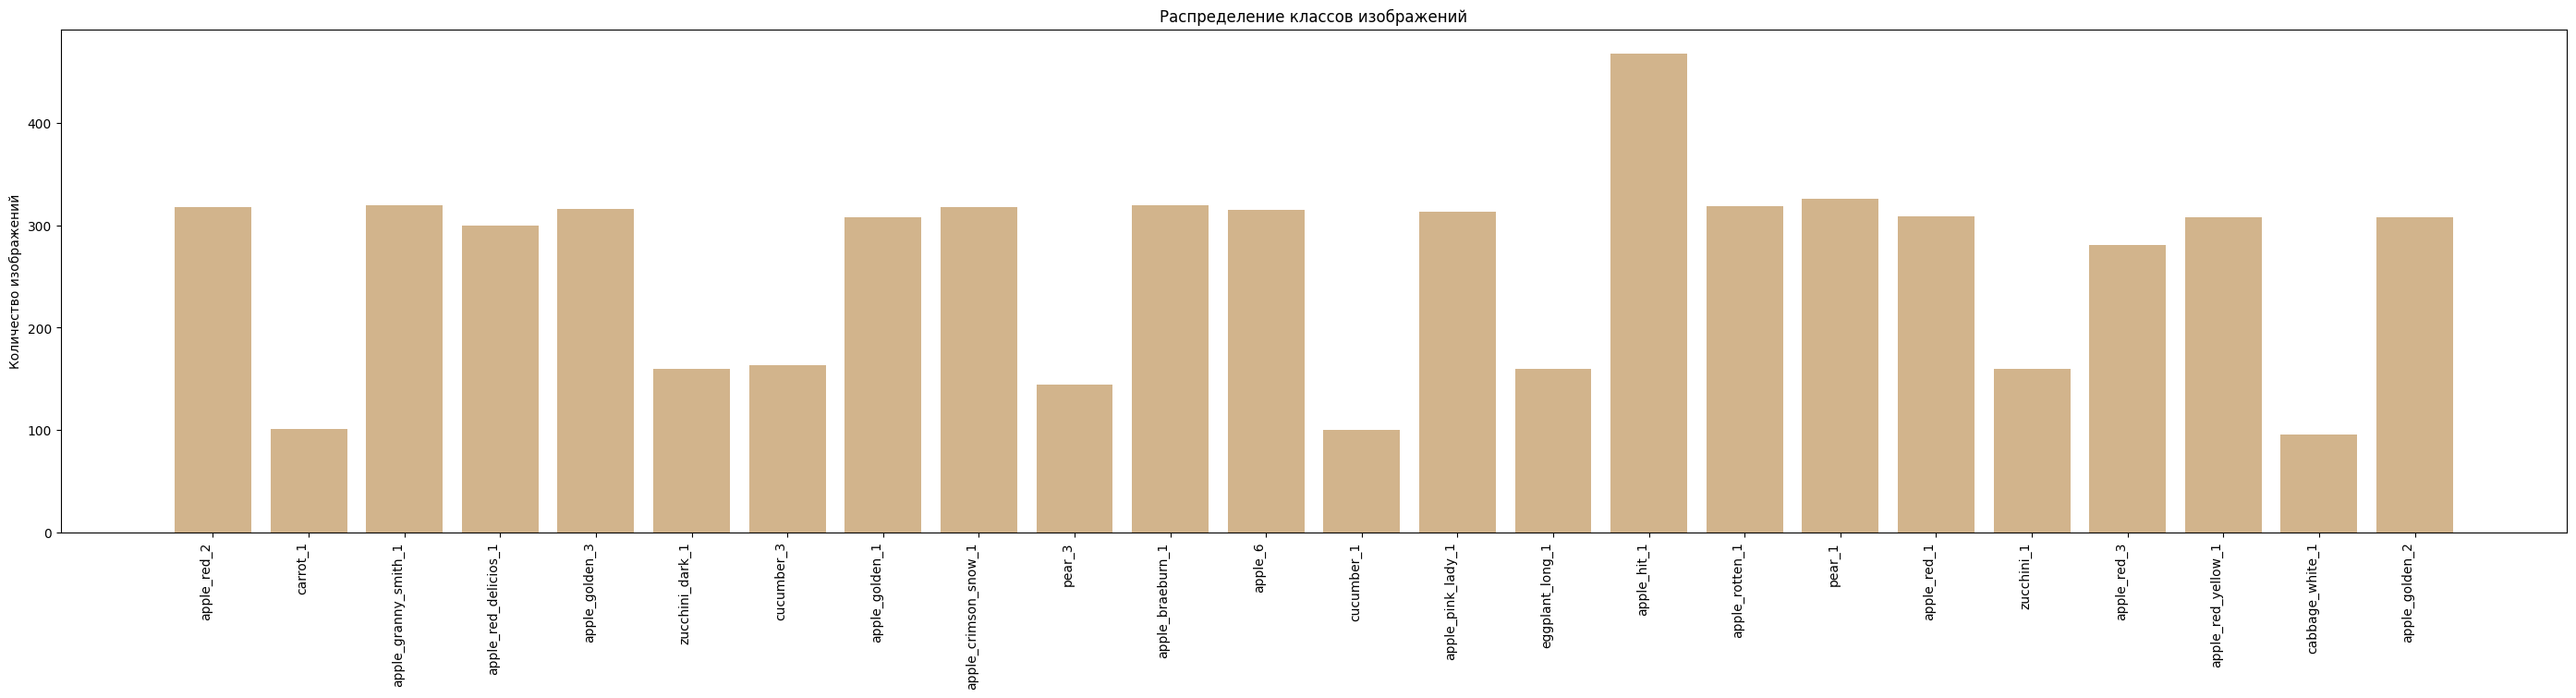

In [26]:
bar(classes, counts)

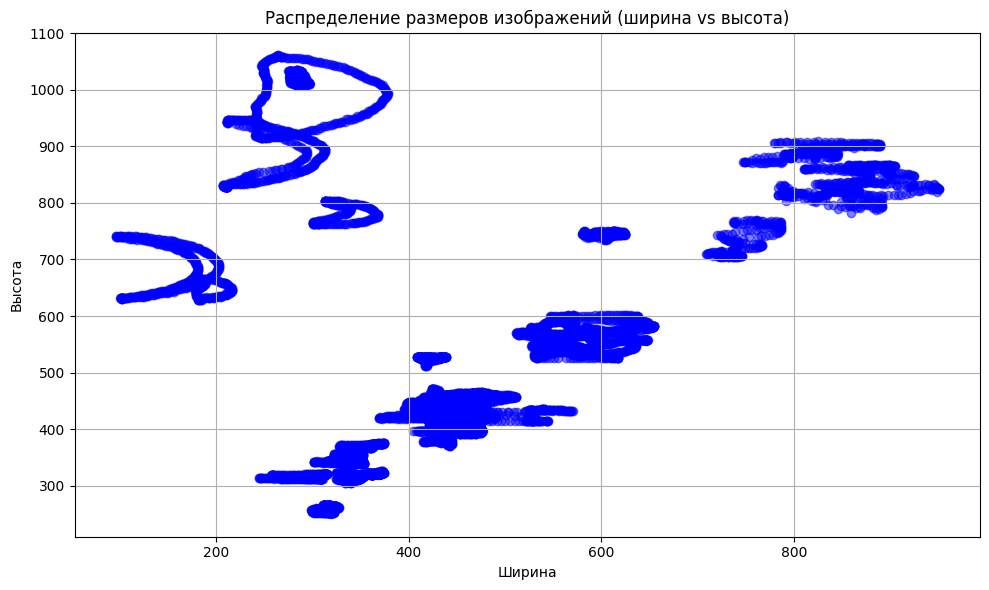

In [27]:
scatter_size_images()